GRADIENT BOOSTING CLASSIFER MODELS FOR 289:10,000 RATIO
> 
**Undersampling the inactive class only**
>
MinMaxScalar will not be used

IMPORTING LIBRARIES AND DATA

In [2]:
# the big three
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# training algorithms
from sklearn.ensemble import GradientBoostingClassifier

# resampling algorithms
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# importing other libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler

# importing metrics 
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix, roc_curve, auc, balanced_accuracy_score

In [3]:
# read dataset into dataframe
df = pd.read_csv("../../../data/final.csv")
df.head()

,D001,D002,D003,D004,D005,D006,D007,D008,D009,D010,...,D769,D770,D771,D772,D773,D774,D775,D776,D777,Activity
0,2,0,0,1,4,0,0,0,0,0,...,0,1,0,0,0,5.45943,-0.367670,0.363636,4.29650,0
1,1,0,0,2,1,0,0,0,0,0,...,0,1,0,0,0,5.08746,-0.772128,0.240000,2.31134,0
2,1,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,4.70044,-0.295978,0.300000,1.67610,0
3,2,0,0,1,3,0,0,0,0,0,...,0,1,1,0,0,5.49185,-0.357977,0.352941,2.63932,0
4,1,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,4.64386,-0.274183,0.315789,1.41996,0


In [4]:
# checking dimension of dataset
df.shape

(195244, 778)

0    194888
1       356
Name: Activity, dtype: int64


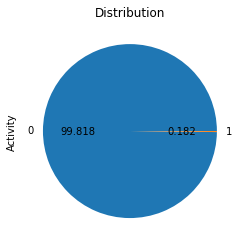

In [5]:
# divide dataframe into features, X and target y
X = df.drop(['Activity'],axis=1)
y = df['Activity']

# checking class distribution
print(y.value_counts())

# visualizing class distribution
ax = y.value_counts().plot(kind = 'pie', autopct = '%.3f')
ax.set_title("Distribution");

DIVIDING INTO TRAIN AND TEST DATASET

The training and test data have the following dimensions:
(156195, 777)(39049, 777)
The class distribution of the train data:
0    155906
1       289
Name: Activity, dtype: int64


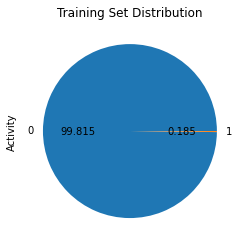

In [6]:
# dividing datasets into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# checking dimensions of train and test dataset
print("The training and test data have the following dimensions:\n{}{}".format(X_train.shape, X_test.shape))

# checking class distribution of train dataset
print("The class distribution of the train data:\n{}".format(y_train.value_counts()))

# visualizing class distribution of train dataset
ax = y_train.value_counts().plot(kind = 'pie', autopct = '%.3f')
ax.set_title("Training Set Distribution");

REMOVING LOW VARIANCE FEATURES
> 
The variance threshold function will remove columns that dont meet a certain threshold. This is done to improve model performance
>
There are two different thresholds for this. Use the second one only when MinMaxScalar was used. You can use only one threshold

In [7]:
vt = VarianceThreshold(threshold=(.8 * (1 - .8)))

# Fit
_ = vt.fit(X_train)

# Get the mask
mask = vt.get_support()

# Subset the DataFrame
X_train = X_train.loc[:, mask]
X_test = X_test.loc[:, mask]

X_train.shape, X_test.shape

((156195, 359), (39049, 359))

The number of rows in the dataset remain the same however the number of columns have reduced

GRADIENT BOOSTING CLASSIFER TRAINING
> 
For this section, the model is trained on either unsampled data or resampled data.

RESAMPLING USING RUS AND SMOTE
> 
The dataset is resampled using either one or a combination of random undersampler and smote with different ratios. Meaning, you can use undersampling and skip oversampling or vice versa or use both
>
**THIS STEP SHOULD BE SKIPPED IF NO RESAMPLING WILL BE DONE**

UNDERSAMPLING

In [8]:
rus = RandomUnderSampler(sampling_strategy=0.0289, random_state=42)
X_train, y_train = rus.fit_resample(X_train, y_train)

# checking class distribution of further resampled dataset
print(y_train.value_counts())

0    10000
1      289
Name: Activity, dtype: int64


**Visualizing distribution of final resampled dataset**


0    10000
1      289
Name: Activity, dtype: int64


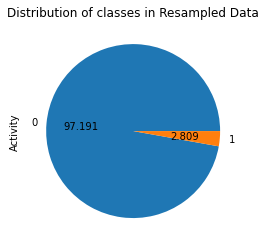

In [9]:
# checking class distribution of further resampled dataset
print(y_train.value_counts())

ax = y_train.value_counts().plot(kind = 'pie', autopct = '%.3f')
ax.set_title("Distribution of classes in Resampled Data");

TRAINING MODELS

In [10]:
# creating model object
clf = GradientBoostingClassifier()

# training model
clf.fit(X_train, y_train)

GradientBoostingClassifier()

PREDICTIONS

In [11]:
# predicting on train dataset
train_predictions = clf.predict(X_train)    

# predicting on test dataset
test_predictions = clf.predict(X_test)

If the performance of the model on the training dataset is significantly better than the performance on the test dataset, then the model may have overfit the training dataset.

CHECKING METRICS
> 
The metrics will be checked for both the training data and the tes dataset
> 
For the confusion matrix: <br>
> 
True Negative (Top-Left Quadrant)<br>
False Positive (Top-Right Quadrant)<br>
False Negative (Bottom-Left Quadrant)<br>
True Positive (Bottom-Right Quadrant)<br>

TRAINING DATA

Accuracy Score:  0.9941685294975217
Balanced Accuracy:  0.8961937716262975
Precision Score:  1.0
Recall Score:  0.7923875432525952
F1 Score:  0.8841698841698843
MCC:  0.887502999324361
AUROC:  0.9948743944636678
Average:  0.8920508396746276


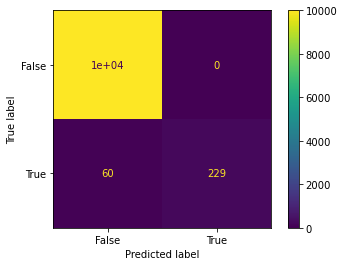

In [12]:
accuracy_train = accuracy_score(y_train, train_predictions)
balanced_accuracy_train = balanced_accuracy_score(y_train, train_predictions)
precision_train = precision_score(y_train, train_predictions)
recall_train = recall_score(y_train, train_predictions)
f1_train = f1_score(y_train, train_predictions)
mcc_train = matthews_corrcoef(y_train, train_predictions)

pred_prob = clf.predict_proba(X_train)[:,1]
auroc_train = roc_auc_score(y_train, pred_prob)

avg_train = np.mean([balanced_accuracy_train, precision_train, recall_train, f1_train, mcc_train])

print("Accuracy Score: ", accuracy_train)
print("Balanced Accuracy: ", balanced_accuracy_train)
print("Precision Score: ", precision_train)
print("Recall Score: ", recall_train)
print("F1 Score: ", f1_train)
print("MCC: ", mcc_train)
print("AUROC: ", auroc_train)

print("Average: ", avg_train)

cm = confusion_matrix(y_train, train_predictions)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()


### TEST DATA

Accuracy Score:  0.9977976388639914
Balanced Accuracy:  0.6934526612742047
Precision Score:  0.36619718309859156
Recall Score:  0.3880597014925373
F1 Score:  0.3768115942028986
MCC:  0.3758678797737608
AUROC:  0.9740142216422888
Average:  0.4400778039683986


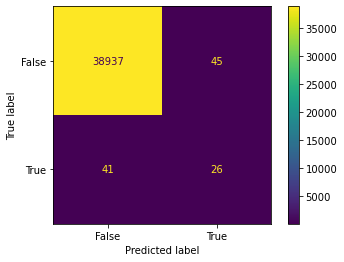

In [13]:
accuracy_test = accuracy_score(y_test, test_predictions)
balanced_accuracy_test = balanced_accuracy_score(y_test, test_predictions)
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_test = f1_score(y_test, test_predictions)
mcc_test = matthews_corrcoef(y_test, test_predictions)

pred_prob = clf.predict_proba(X_test)
auroc_test = roc_auc_score(y_test, pred_prob[:,1])

#taking the mean of balanced accuracy, precision, recall, f1 and mcc
avg_test = np.mean([balanced_accuracy_test, precision_test, recall_test, f1_test, mcc_test])

print("Accuracy Score: ", accuracy_test)
print("Balanced Accuracy: ", balanced_accuracy_test)
print("Precision Score: ", precision_test)
print("Recall Score: ", recall_test)
print("F1 Score: ", f1_test)
print("MCC: ", mcc_test)
print("AUROC: ", auroc_test)

print("Average: ", avg_test)

cm = confusion_matrix(y_test, test_predictions)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

PLOTTING THE AUROC CURVE
> 
This is done for only the test data

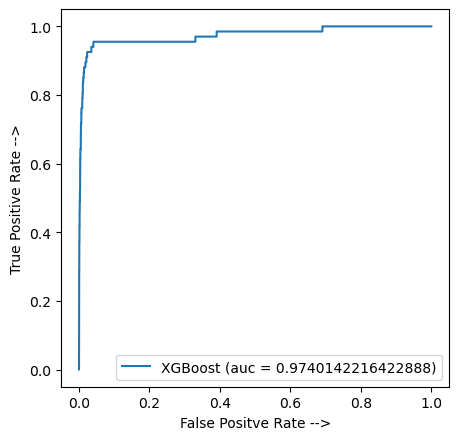

In [14]:
fpr, tpr, threshold = roc_curve(y_test, pred_prob[:, 1])
auc_score = auc(fpr, tpr)

plt.figure(figsize = (5, 5), dpi = 100)
plt.plot(fpr, tpr, label = 'XGBoost (auc = {})' .format(auc_score))
plt.xlabel('False Positve Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()
plt.show()